# Assignment 12

### 1.复习上课内容

In [45]:
import pandas as pd
import jieba

### 2.回答以下理论问题

#### 1. 请写一下TF-IDF的计算公式

$$w_{t,d} = tf_{t,d} * idf_{t}$$
$$tf_{t,d} = frequence of word in the article，  idf_{t} = lg(number of articles/articles including the word+1)$$

#### 2. LDA算法的基本假设是什么？
文档的主题，每个主题下出现的词，都遵循一定分布。


#### 3. 在TextRank算法中构建图的权重是如何得到的？

TextRank 一般模型可以表示为一个有向有权图 G =(V, E), 由点集合 V和边集合 E 组成, E 是V ×V的子集。图中任两点 Vi , Vj 之间边的权重为 wji , 对于一个给定的点 Vi, In(Vi) 为 指 向 该 点的点集 合 , Out(Vi) 为点 Vi 指向的点集合。其中, d 为阻尼系数, 取值范围为 0 到 1, 代表从图中某一特定点指向其他任意点的概率, 一般取值为 0.85。使用TextRank 算法计算图中各点的得分时, 需要给图中的点指定任意的初值, 并递归计算直到收敛, 即图中任意一点的误差率小于给定的极限值时就可以达到收敛, 一般该极限值取 0.0001。

#### 4. 什么是命名实体识别？ 有什么应用场景？

人名（PER），地名（LOC），机构名（ORG）等类型的实际个体的分类。知识图谱中的物体分类。

#### 5.NLP主要有哪几类任务 ？

词法分析（纠错）；句法分析（依存句法分析）；语义分析（Word/Sentence/Paragraph Vector）；信息抽取（关系、事件、意图抽取）；顶层任务（机器翻译，文本摘要）。

### 3.实践题

#### 3.1 手动实现TextRank算法 (在新闻数据中随机提取100条新闻训练词向量和做做法测试）

 提示：
 1. 确定窗口，建立图链接。   
 2. 通过词向量相似度确定图上边的权重
 3. 根据公式实现算法迭代(d=0.85)

TextRank基本思想：
 1. 链接数量。一个网页被越多的其他网页链接，说明这个网页越重要。
 2. 链接质量。一个网页被一个越高权值的网页链接，也能表明这个网页越重要。
    
　　TextRank 用于关键词提取的算法如下：
    （1）把给定的文本 T 按照完整句子进行分割，即:T=[S1,S2,…,Sm]
    （2）对于每个句子，进行分词和词性标注处理，并过滤掉停用词，只保留指定词性的单词，如名词、动词、形容词，其中 ti,j 是保留后的候选关键词。Si=[ti,1,ti,2,...,ti,n]
    （3）构建候选关键词图 G = (V,E)，其中 V 为节点集，由（2）生成的候选关键词组成，然后采用共现关系（Co-Occurrence）构造任两点之间的边，两个节点之间存在边仅当它们对应的词汇在长度为K 的窗口中共现，K表示窗口大小，即最多共现 K 个单词。
    （4）根据 TextRank 的公式，迭代传播各节点的权重，直至收敛。
    （5）对节点权重进行倒序排序，从而得到最重要的 T 个单词，作为候选关键词。
    （6）由（5）得到最重要的 T 个单词，在原始文本中进行标记，若形成相邻词组，则组合成多词关键词。 

In [33]:
stop_words = open('百度停用词表.txt',encoding = 'utf-8').read().split('\n')
stop_words[:3]

['--', '?', '“']

In [34]:
content = open('article_9k.txt', encoding = 'utf-8').read().split('\n')
content = content[:1][0]
word_list = jieba.cut(content)

In [35]:
word_list = [w for w in word_list if w not in stop_words]
word_list

['本周',
 '6',
 '月',
 '12',
 '日起',
 '小米',
 '手机',
 '6',
 '15',
 '款',
 '机型',
 '外',
 '机型',
 '已',
 '暂停',
 '更新',
 '发布',
 '含',
 '开发',
 '版',
 '体验版',
 '内测',
 '稳定版',
 '暂不受',
 '影响',
 '确保',
 '工程师',
 '精力',
 '系统优化',
 '工作',
 '有人',
 '猜测',
 '精力',
 '用到',
 'MIUI9',
 '研发',
 '之中',
 'MIUI8',
 '去年',
 '5',
 '月',
 '发布',
 '距今已有',
 '一年',
 '有余',
 '更新换代',
 'MIUI9',
 '确切',
 '信息',
 '等待',
 '官方消息']

In [62]:
from collections import defaultdict

def creat_graph(window_len, words_list):
    graph_nodes = defaultdict(set)
    for index, word in enumerate(words_list):
        
        window_left = index - window_len + 1
        window_right = index + window_len
        if window_left < 0:
            window_left = 0
        if window_right >= len(words_list):
            window_right = len(words_list) - 1
        
        for i in range(window_left, window_right):
            if i == index: continue
            
            graph_nodes[word].add(words_list[i])
    return graph_nodes

In [63]:
a = creat_graph(3, word_list)#3个词的的窗口，共同出现一次算一次链接

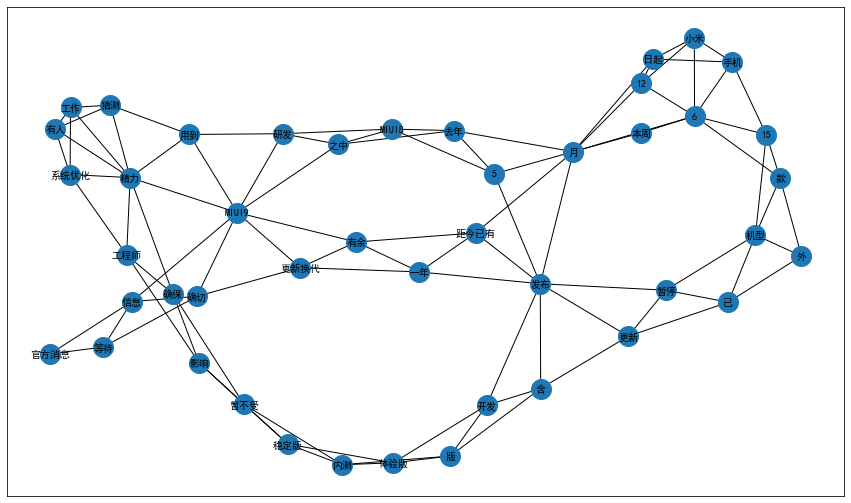

In [67]:
#无向图
import networkx as nx
import matplotlib.pyplot as plt
# plt.rcParams["font.family"] = 'Arial Unicode MS'
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['font.family']='sans-serif'

G = nx.Graph()
for key,value in a.items():
    for i in range(len(value)):
        G.add_edge(key,list(value)[i])

plt.figure(figsize=(15, 9))
nx.draw_networkx(G,font_size=10,node_size=400)

plt.show()

In [68]:
def calc_rank_value(graph, d=0.85, iter_value=50):
    ws = defaultdict(float)
    ws_init = 1 / len(graph)
    for key, val in graph.items():
        ws[key] = ws_init
        
    for i in range(0, iter_value):
        for node, set_ in graph.items():
            ws[node] = (1-d) + d*sum( (ws[i]/len(graph[i]) for i in set_))
    
    return sorted(ws.items(), key=lambda x : x[1], reverse=True)

In [69]:
graph = creat_graph(3, word_list)

In [70]:
text_rank = calc_rank_value(graph)

In [71]:
text_rank[:10]

[('MIUI9', 1.7596196637493287),
 ('精力', 1.7030933299394482),
 ('月', 1.6981213025530124),
 ('发布', 1.6947865071367247),
 ('6', 1.5222312811670036),
 ('机型', 1.330640962027179),
 ('确切', 1.019292218446992),
 ('稳定版', 0.9689029599330713),
 ('内测', 0.9688288204862949),
 ('暂不受', 0.9641038186506283)]

#### 选做 1.  提取新闻人物里的对话。(使用以上提取小数据即可）

提示：    
1.寻找预料里具有表示说的意思。    
2.使用语法分析提取句子结构。    
3.检测谓语是否有表示说的意思。

In [ ]:
from pyltp import SentenceSplitter
from pyltp import Segmentor
from pyltp import Postagger
from pyltp import Parser

In [ ]:
news = '（原标题：李克强为什么提出“营商环境就是生产力”？）\r\n\u3000\u3000(一)\r\n短短一周内，李克强总理接连三次提到一个词组：“优化营商环境”。\r\n“这几年，我国营商环境纵向比已有不少改善。根据世界银行发布的《全球营商环境报告》，中国营商便利度近三年在全球排名跃升18位，其中开办企业便利度大幅上升31位。” 在6月13日召开的全国深化“放管服”改革电视电话会议上总理说，“但大家必须清醒看到，如果横向比较，我国营商环境排名不仅落后于发达经济体，也落后于许多发展中国家。”\r\n就此，他加重语气对与会人员说：“营商环境就是生产力!”\r\n此前两天，李克强在会见出席第二届世界华侨华人工商大会全体代表时表示，中国将会创造更加便利的营商环境吸引投资。而在一周前的国务院常务会议上，李克强在部署新建“双创”示范基地时强调，要创造更优的“硬环境”和“软环境”，加大对外资外智的吸引力。\r\n事实上，李克强对这一问题的重视远不止于本周。如果纵向看，“优化营商环境”自始至终是总理工作的着眼点和着力点。今年6月出访欧盟期间，李克强总理向中欧工商界代表表示，中国会继续扩大开放，进一步优化营商环境。他在四五月的两次国务院常务会议上强调，在全球竞争加剧的大背景下，各级政府要进一步增加紧迫感，给市场以良好预期，切实提振市场信心。\r\n怎样给市场以良好预期?总理一语中的：“必须下大工夫、真功夫，进一步深化‘放管服’改革，持续优化我国的营商环境。”\r\n\u3000\u3000(二)\r\n在强调“优化营商环境”的重要性时，李克强要求国务院有关部门要树立“抢跑意识”。\r\n“当前不少国家都在简化开办企业手续、酝酿出台减税措施。”总理说，“我们必须营造更有吸引力的国际化、法治化、便利化营商环境，降低制度性成本，培育提升我国国际竞争新优势。”\r\n事实是，改革的紧迫性不仅来自日趋激烈的国际竞争，更来自国内企业减负的共同呼声。在一次会议上李克强总理直言不讳说，很多企业负责人反映，他们很欢迎减税降费政策，但同时也更希望进一步降低制度性交易成本。\r\n总理就此强调，政府出台政策一定要“出到点子上”：“关键还是要扎实推进‘放管服’改革，创造良好的营商环境。”\r\n有评论指出，“放管服”改革的要义其实就是“造环境”。环境优了，不仅可以招“财”来，更会引“才”到。在“造环境”方面，上海自贸区就是很好的范例：自贸区挂牌短短三年便吸引超过4万家企业前来注册——这一数字是挂牌前20多年的总和。\r\n总理为什么提出“营商环境就是生产力”?其真正的意义正在于此。\r\n\u3000\u3000(三)\r\n需要指出的是，在改革开放相当长一个阶段中，我们许多政府官员更习惯于“抓项目”。而“放管服”改革的最终目标之一，就是要持续不断地“优化营商环境”，通俗讲就是“造环境”。其中蕴含着从“计划”向“市场”过渡这一关键的政府职能转变。\r\n在6月13日的“放管服”会议上，李克强突出强调，改善营商环境要进一步做好简政放权的“减法”、做强监管的“加法”和优化服务的“乘法”。他特别表扬，有的省份逐项对标世界银行发布的“企业营商环境指标”，结合本省创业创新环境指标的差距，提出全面优化营商环境的新举措。\r\n“各地都应该这么做。既不忘‘抓项目’的老本事，更要学习‘造环境’的新本领。”李克强说，“要由过去偏重追求政策‘洼地’，转为更倾力打造公平营商环境的‘高地’。”\r\n'

In [ ]:
LTP_DATA_DIR = '../ltp_data_v3.4.0'  # ltp模型目录的路径

In [ ]:
# 第一步：分句
sents = SentenceSplitter.split(news) 

sents = [sen for sen in list(sents) if sen]
sents

In [ ]:
# 第二步： 分词
cws_model_path = os.path.join(LTP_DATA_DIR, 'cws.model')
segmentor = Segmentor()
segmentor.load(cws_model_path)
words = [segmentor.segment(sen) for sen in sents]
# print ('\t'.join(words))
segmentor.release()
' '.join(words[0])

In [ ]:
# 第三步： 词性标注
pos_model_path = os.path.join(LTP_DATA_DIR, 'pos.model')  # 词性标注模型路径，模型名称为`pos.model`
postagger = Postagger()
postagger.load(pos_model_path) 

postags = [postagger.postag(word) for word in words] # 词性标注

postagger.release()  # 释放模型
' '.join(postags[0])

In [ ]:
# 第四步： 依存句法分析
par_model_path = os.path.join(LTP_DATA_DIR, 'parser.model')
parser = Parser()
parser.load(par_model_path) 

arcs = []
for i in range(0, len(words)):
    arcs.append(parser.parse(words[i], postags[i]))

print ("\t".join("%d:%s" % (arc.head, arc.relation) for arc in arcs[0]))
parser.release()

In [ ]:
# 第五步： 处理数据
speak_words = ['说', '表示', '告知', '声明', '讲', '发表', '提出']

In [ ]:
arc_list = [[[arc.head, arc.relation] for arc in arc_] for arc_ in arcs]

In [ ]:
word_list = list(words[0])
arc_list = [[arc.head, arc.relation] for arc in arcs[0]]

In [ ]:
def find_head(word_list, arc_list):
    for i, arc in enumerate(arc_list):
        if arc[1] == 'HED':
            return i

In [ ]:
def find_connect_node(node_index, arc_list):
    connect_node = []
    for i, arc in enumerate(arc_list):
        if arc[0] == node_index + 1:
            connect_node.append(i)
    return connect_node

In [ ]:
def find_sbv(head_index, arc_list):
    sbv_list = []
    for i, arc in enumerate(arc_list):
        if arc[1] == 'SBV':
            sbv_list.append(i)

In [ ]:
def get_all_object(index, arc_list):
        
    nodes = find_connect_node(index, arc_list) 
    if nodes == []:
        return []
    all_node = []
    for i in nodes:
        temp = get_all_object(i, arc_list)
        if temp == []:
            continue
        all_node += temp
    
    return all_node + nodes

# get_all_object(11)

In [ ]:
def get_speaker_sents(words, arcs):
    word_list = [list(word) for word in words]
    arc_list = [[[arc.head, arc.relation] for arc in arc_] for arc_ in arcs]
    
    for i, word in enumerate(word_list):
        head_index = find_head(word, arc_list[i])
        if word[head_index] not in speak_words:
            continue
        
        head_connect = find_connect_node(head_index, arc_list[i])
        
        sbv_list = []
        object_list = []
        for index in head_connect:  
            if arc_list[i][index][1] == 'SBV':
                sbv_list.append(index)
            elif arc_list[i][index][1] == 'VOB':
                object_list = sorted(get_all_object(index, arc_list[i]) + [index])

        speak_sent = sbv_list + [head_index] + object_list
        print(''.join([word_list[i][j] for j in speak_sent]))

In [ ]:
get_speaker_sents(words, arcs)